In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..\..'))
	print(os.getcwd())
except:
	pass


In [1]:
import numpy as np
from numpy import pi,sin,cos,exp,sqrt
import matplotlib.pyplot as plt

In [2]:
# Global Experimental parameters
nIter = 10
N = 200 # number of neurons
M = 10 # number of memorys, every trace will be attemped to recall
T_theta = 125 # theta oscillation period in ms
tf = 10*T_theta # integration time for each recall
dt = 1 # timestep for saving results
k_prior = 0.5 # concentration parameter for prior distribution
k_cue0 = 16 # for initial cue distribution
v_noise_inv_s = [16,8,4,2,1] # for cue noise accumulation, k_cue(t) = 1/( 1/k_cue0 + v_noise*t/T_theta )
dirname = 'Lengyel2005_alwaysUpdateXj_stochasticCue_diffuse/'
dspL_ctr = []
dspL_dyn = []

for v_noise_inv in v_noise_inv_s:
    v_noise = 1./v_noise_inv
    #%% Load data
    # load data
    t = np.arange(0,tf,dt)
    len_t = len(t)
    xMemory = np.empty((nIter,N,M))
    xRecalled = np.empty((nIter,N,len_t,M))
    xNoise = np.empty((nIter,N,len_t+1,M))
    for iIter in range(nIter):
        filename = 'Data/'+dirname+'Lengyel2005_alwaysUpdateXj_stochasticCue_kt%02d_iter%02d.npz'%(v_noise_inv,iIter)
        loaded = np.load(filename)
        # print(loaded.files)
        xMemory[iIter] = loaded['xMemory']
        xRecalled[iIter] = loaded['xRecalled']
        xNoise[iIter] = loaded['xNoise']



    #%% with dynamic weight
    # Error of result simulated with dynamic weight
    xError = np.empty_like(xRecalled)
    for tt in range(len_t):
        xError[:,:,tt,:] = xRecalled[:,:,tt,:] - xMemory
    xError = np.swapaxes(xError,2,3)
    xError = np.reshape(xError,(nIter*N*M,len_t),order='C')
    xError = np.mod(xError+pi,pi*2) - pi

    #%% Control level
    # Control level (FF only)
    k_cue = 1/ (1/k_cue0 + v_noise*t/T_theta)
    xError_FF = np.empty_like(xError)
    for tt in range(len_t):
        xCue = xNoise[:,:,tt,:] + xMemory
        Z = exp(1j*xCue) + k_prior/k_cue[tt]
        xFF = np.angle(Z)
        Error_t = xFF-xMemory
        xError_FF[:,tt] = Error_t.flatten()
    xError_FF = np.mod(xError_FF+pi,pi*2) - pi

    # #%% save
    # filename = 'Data/'+dirname+'ErrorCombined.npz'
    # xError_all = np.array([xError,xError_FF])
    # np.savez(filename,xError=xError,xError_FF=xError_FF,xError_all=xError_all)

    # #%% load
    # filename = 'Data/'+dirname+'ErrorCombined.npz'
    # loaded = np.load(filename)
    # xError = loaded['xError']
    # # xError_n = loaded['xError_n']
    # xError_FF = loaded['xError_FF']

    #%% stats time course 
    bias = np.mean(xError,axis=0)
    stdL = np.std(xError,axis=0)
    dspL_dyn.append(stdL**2 + bias**2)
    
    bias = np.mean(xError_FF,axis=0)
    stdL = np.std(xError_FF,axis=0)
    dspL_ctr.append(stdL**2 + bias**2)

    # vR   = exp(1j*xError_all)
    # R    = abs(np.mean(vR,axis=1))
    # varC = 1-R
    # dspC = varC + 2*R*(np.sin(bias/2)**2)


In [3]:
fig,ax = plt.subplots()
for m in range(len(v_noise_inv_s)):
    ax.plot(t,dspL_dyn[m],label='diffuse_rate: 1/'+v_noise_inv_s[m])
ax.set_xlabel('time (ms)')
ax.set_ylabel('linear mean squared error')
fig.legend()

TypeError: can only concatenate str (not "int") to str

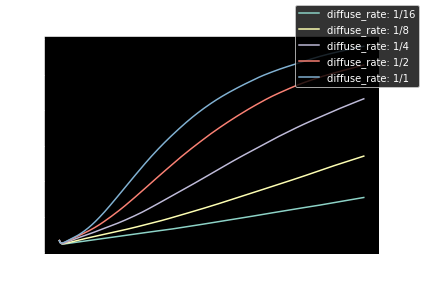

In [4]:
fig,ax = plt.subplots()
for m in range(len(v_noise_inv_s)):
    ax.plot(t,dspL_dyn[m],label='diffuse_rate: 1/'+str(v_noise_inv_s[m]))
ax.set_xlabel('time (ms)')
ax.set_ylabel('linear mean squared error')
fig.legend()

In [5]:
# print(plt.style.available)
plt.style.use('seaborn')
# plt.style.use('seaborn-talk')

# #%%
# tt = int(1200/dt)
# hist = [None for _ in range(2)]
# fig1,ax1 = plt.subplots()
# for m in range(2):
#     hist[m],bin_edges,_ = ax1.hist(xError_all[m][:,tt],200,(-pi,pi), label=labels[m])
# fig1.legend()
# fig2 = plt.figure()
# ax2 = fig2.add_subplot(111,projection='polar')
# for m in range(2):
#     ax2.plot(bin_edges,np.append(hist[m],hist[m][0]),drawstyle='steps-pre',label=labels[m])
# fig2.legend()


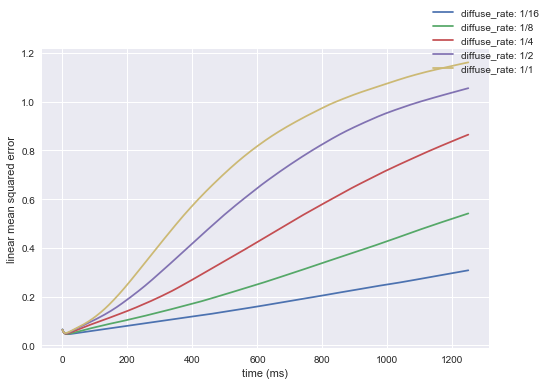

In [6]:
fig,ax = plt.subplots()
for m in range(len(v_noise_inv_s)):
    ax.plot(t,dspL_dyn[m],label='diffuse_rate: 1/'+str(v_noise_inv_s[m]))
ax.set_xlabel('time (ms)')
ax.set_ylabel('linear mean squared error')
fig.legend()

In [7]:
fig,ax = plt.subplots()
for m in range(len(v_noise_inv_s)):
    ax.plot(t,dspL_dyn[m]/dspL_ctr[m],label='diffuse_rate: 1/'+v_noise_inv_s[m])
ax.set_xlabel('time (ms)')
ax.set_ylabel('normalized MSE')
fig.legend()



TypeError: can only concatenate str (not "int") to str

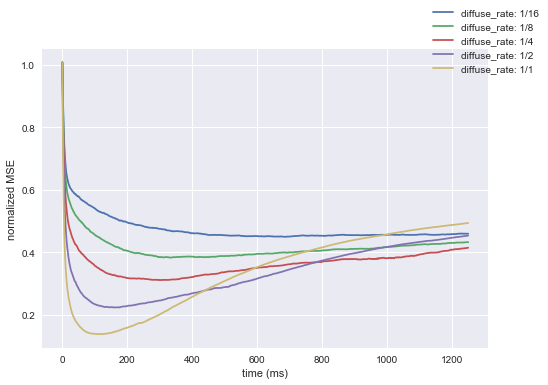

In [8]:
fig,ax = plt.subplots()
for m in range(len(v_noise_inv_s)):
    ax.plot(t,dspL_dyn[m]/dspL_ctr[m],label='diffuse_rate: 1/'+str(v_noise_inv_s[m]))
ax.set_xlabel('time (ms)')
ax.set_ylabel('normalized MSE')
fig.legend()



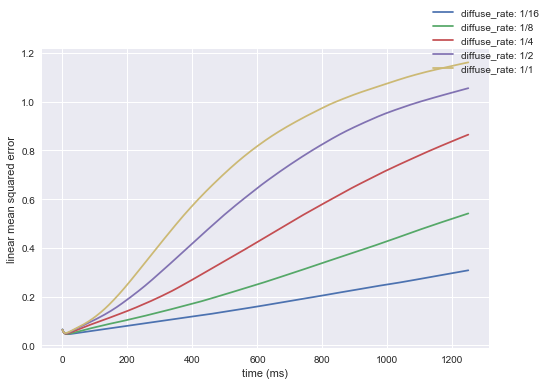

In [9]:
fig,ax = plt.subplots()
for m in range(len(v_noise_inv_s)):
    ax.plot(t,dspL_dyn[m],label='diffuse_rate: 1/'+str(v_noise_inv_s[m]),color='C'+str(m))
ax.set_xlabel('time (ms)')
ax.set_ylabel('linear mean squared error')
fig.legend()

In [10]:
fig,ax = plt.subplots()
for m in range(len(v_noise_inv_s)):
    ax.plot(t,dspL_dyn[m],label='diffuse_rate: 1/'+str(v_noise_inv_s[m]),color='C'+str(m))
    ax.plot(t,dspL_str[m],label='diffuse_rate: 1/'+str(v_noise_inv_s[m]),color='C'+str(m),ls='--')
ax.set_xlabel('time (ms)')
ax.set_ylabel('linear mean squared error')
fig.legend()

NameError: name 'dspL_str' is not defined

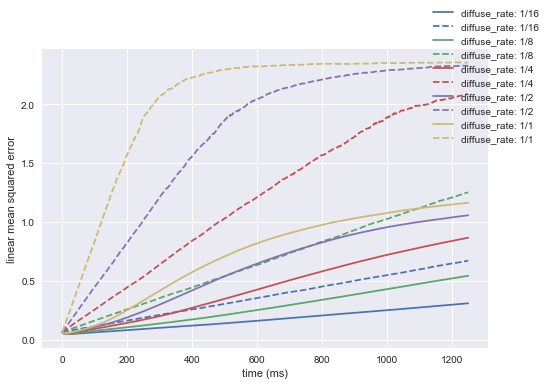

In [11]:
fig,ax = plt.subplots()
for m in range(len(v_noise_inv_s)):
    ax.plot(t,dspL_dyn[m],label='diffuse_rate: 1/'+str(v_noise_inv_s[m]),color='C'+str(m))
    ax.plot(t,dspL_ctr[m],label='diffuse_rate: 1/'+str(v_noise_inv_s[m]),color='C'+str(m),ls='--')
ax.set_xlabel('time (ms)')
ax.set_ylabel('linear mean squared error')
fig.legend()

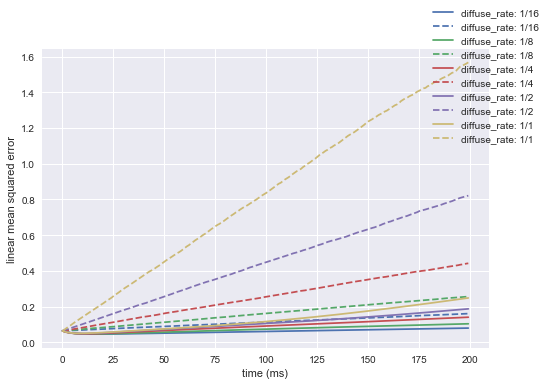

In [12]:
fig,ax = plt.subplots()
for m in range(len(v_noise_inv_s)):
    ax.plot(t[0:200],dspL_dyn[m][0:200],label='diffuse_rate: 1/'+str(v_noise_inv_s[m]),color='C'+str(m))
    ax.plot(t[0:200],dspL_ctr[m][0:200],label='diffuse_rate: 1/'+str(v_noise_inv_s[m]),color='C'+str(m),ls='--')
ax.set_xlabel('time (ms)')
ax.set_ylabel('linear mean squared error')
fig.legend()